# Learning objectives
- Understand why we might want to group observations within categories of one feature (i.e. marker) and learn about the distribution within groups
- Create numeric summaries of grouped data
- Create and interpret visual summaries of grouped data

In [2]:
import seaborn as sns
sns.set_theme()

data_dir = 'drive/MyDrive/ds4bio/'
data_dir = '~/ds4bio/'
import pandas as pd
geno = pd.read_csv(data_dir + "arabmagic/arabmagic_geno.csv",skiprows=3,index_col=0)
pmap = pd.read_csv(data_dir + "arabmagic/arabmagic_pmap_tair9.csv", skiprows=3,index_col=0)
pheno = pd.read_csv(data_dir + "arabmagic/arabmagic_pheno.csv",skiprows=3,index_col=0)

counts = pd.read_table(data_dir + "eco_data/species_counts.txt")
sites = pd.read_table(data_dir + "eco_data/eco_sites.txt")

states = pd.read_csv(data_dir + "state_health.csv",index_col = 0) 

gwas_plus_pmap = pd.read_csv(data_dir + "gwas_plus_pmap.csv", index_col = 0)
fruit_length_geno = pd.read_csv(data_dir + "fruit_length_geno.csv", index_col = 0)

# 1. Grouping your data
You can group together observations in your dataframe using one feature and obtain summaries of the observations and the other features with `groupby`

In [15]:
gwas_plus_pmap

,bolting_days,seed_weight,seed_area,ttl_seedspfruit,branches,height,pc_seeds_aborted,fruit_length,chr,pos
MN1_29291,1.293126,-0.068388,-0.003500,1.263866,0.295680,0.476892,-0.232567,0.219775,1,0.029291
MN1_29716,1.293126,-0.068388,-0.003500,1.263866,0.295680,0.476892,-0.232567,0.219775,1,0.029757
MN1_112907,1.195726,-0.193139,-0.004987,0.835984,0.200622,-0.340010,-0.179614,0.361271,1,0.112907
MASC03771,-1.844612,-0.480599,-0.011698,1.846814,0.025621,-0.244310,0.363836,0.393748,1,0.174605
MN1_197787,-1.381036,-0.973285,-0.023788,1.848979,0.192652,2.811966,0.037710,0.391494,1,0.197787
...,...,...,...,...,...,...,...,...,...,...
MN5_26437895,1.002619,0.909351,0.022294,-1.640437,-0.226095,0.941392,0.141553,0.093135,5,26.420670
MN5_26438023,1.426939,0.990801,0.022686,-1.469499,-0.330995,0.555992,0.263476,-0.010135,5,26.420798
MN5_26708459,-3.322726,-0.102616,-0.009087,2.726329,-0.134728,1.113595,0.293149,0.109211,5,26.691233
MN5_26877341,0.627625,-0.346788,-0.004810,0.384560,-0.083017,0.186449,-0.007434,0.178235,5,26.860115


In [10]:
gwas_plus_pmap.groupby('chr').size() 

chr
1    274
2    211
3    248
4    228
5    290
dtype: int64

In [12]:
gwas_plus_pmap.shape

(1251, 10)

In [13]:
gwas_plus_pmap.groupby('chr').size().sum() 

1251

Note that this gives you a new data frame or series

**Exercise 1.1**: Make a visualization that you can compare these numbers to. Are they the same?

**Exercise 1.2**: verify using vectorized operations that there are indeed 274 rows corresponding to chromosome 1

In [20]:
is_4 = gwas_plus_pmap['chr'] == 4
is_4.sum()

228

**Exercise 1.3**: using the `fruit_length_geno` data frame, group by marker MASC06116 to find out how many plants there are of each genotype

Just like with other vectorized data frame operations, There are a number of operations you can apply to your `groupby` result data frame, including `mean` which will get the mean in each group, `min`, `max`, etc...

**Exercise 1.4**: Find the maximum value of fruit_length in the 2 genotype groups grouped by MASC06116

**Exercise 1.5**: Use groupby to get the phenotype means for the A and B genotypes of marker MASC06116. Compare this to what we previously calculated in the GWAS.

In [25]:
fruit_length_geno

,bolting_days,seed_weight,seed_area,ttl_seedspfruit,branches,height,pc_seeds_aborted,fruit_length,MASC06116,MASC02863,FES1_3177,RAX2_405,MASC05402
id,,,,,,,,,,,,,
MAGIC.1,15.33,17.15,0.64,45.11,10.50,NaN,0.00,14.95,A,A,A,A,A
MAGIC.2,22.00,22.71,0.75,49.11,4.33,42.33,1.09,13.27,A,A,A,A,A
MAGIC.3,23.00,21.03,0.68,57.00,4.67,50.00,0.00,13.90,A,A,A,A,A
MAGIC.4,18.67,22.45,0.74,54.33,6.33,NaN,0.23,15.93,A,A,A,A,A
MAGIC.5,18.67,25.36,0.82,38.33,5.67,42.25,0.00,12.81,A,A,A,A,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...
MAGIC.699,27.67,17.17,0.46,47.22,8.00,43.17,0.21,15.13,A,A,A,A,A
MAGIC.700,27.67,18.46,0.97,48.89,7.00,47.73,0.49,NaN,A,A,A,A,A
MAGIC.701,26.50,21.62,0.66,54.20,3.50,38.57,0.00,15.98,A,A,A,A,A


In [23]:

fruit_length_geno.groupby('MASC06116').mean()

,bolting_days,seed_weight,seed_area,ttl_seedspfruit,branches,height,pc_seeds_aborted,fruit_length
MASC06116,,,,,,,,
A,23.486067,22.253774,0.744147,52.498742,5.826586,43.287227,0.917182,15.148368
B,23.005510,20.887551,0.712245,52.087347,5.618776,23.013684,0.835510,12.301429


In [30]:
fl = fruit_length_geno['fruit_length']
is_a = fruit_length_geno['MASC06116'] == 'B'
fl.loc[is_a].mean()

12.301428571428568

# 2. "categorical plots" `catplots`: Boxplots, violin plots & company
Using `catplots` we can plot a number feature and a categorical feature together, to do a similar comparison as our pair of histograms

Continuing with the fruit_length, we can plot the same comparison in many different ways.

## 2.1 Strip plot
This adds "jitter" to the categorical variable to make it easier to visualize.

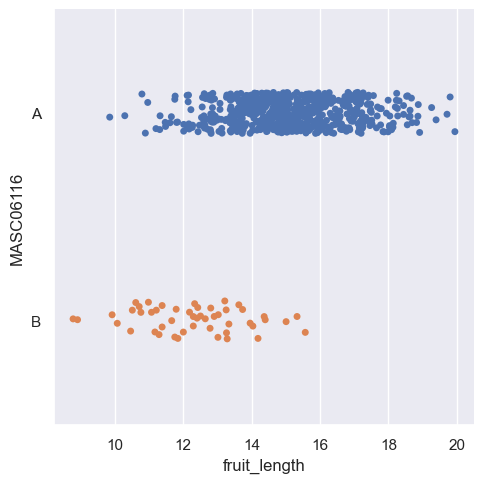

In [6]:
sns.catplot(y="MASC06116", x="fruit_length", data=fruit_length_geno)

In [5]:
%matplotlib inline

**Exercise 2.1**: What are the axes? What are the data points? How can you interpret this plot?

In [36]:
%matplotlib inline

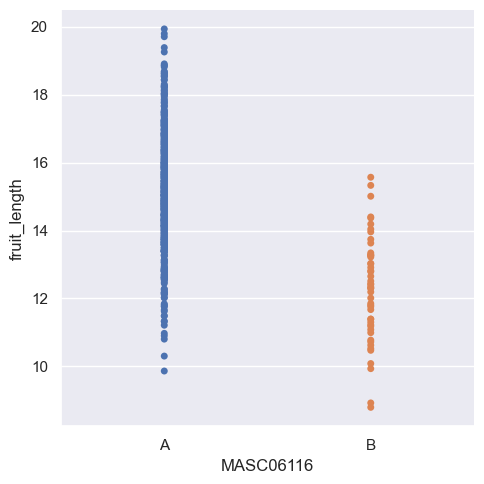

In [37]:
sns.catplot(x="MASC06116", y="fruit_length", data=fruit_length_geno, jitter =False)

**Exercise 2.2**: what happened now? Explain the purpose of the `jitter`. What is the default value for `jitter`

## 2.2 Box plot
Using the same `catplot` function we can do other plots. 

Here's a box plot. Box plot legend [here](https://wilkelab.org/SDS375/slides/visualizing-distributions-2.html#10).


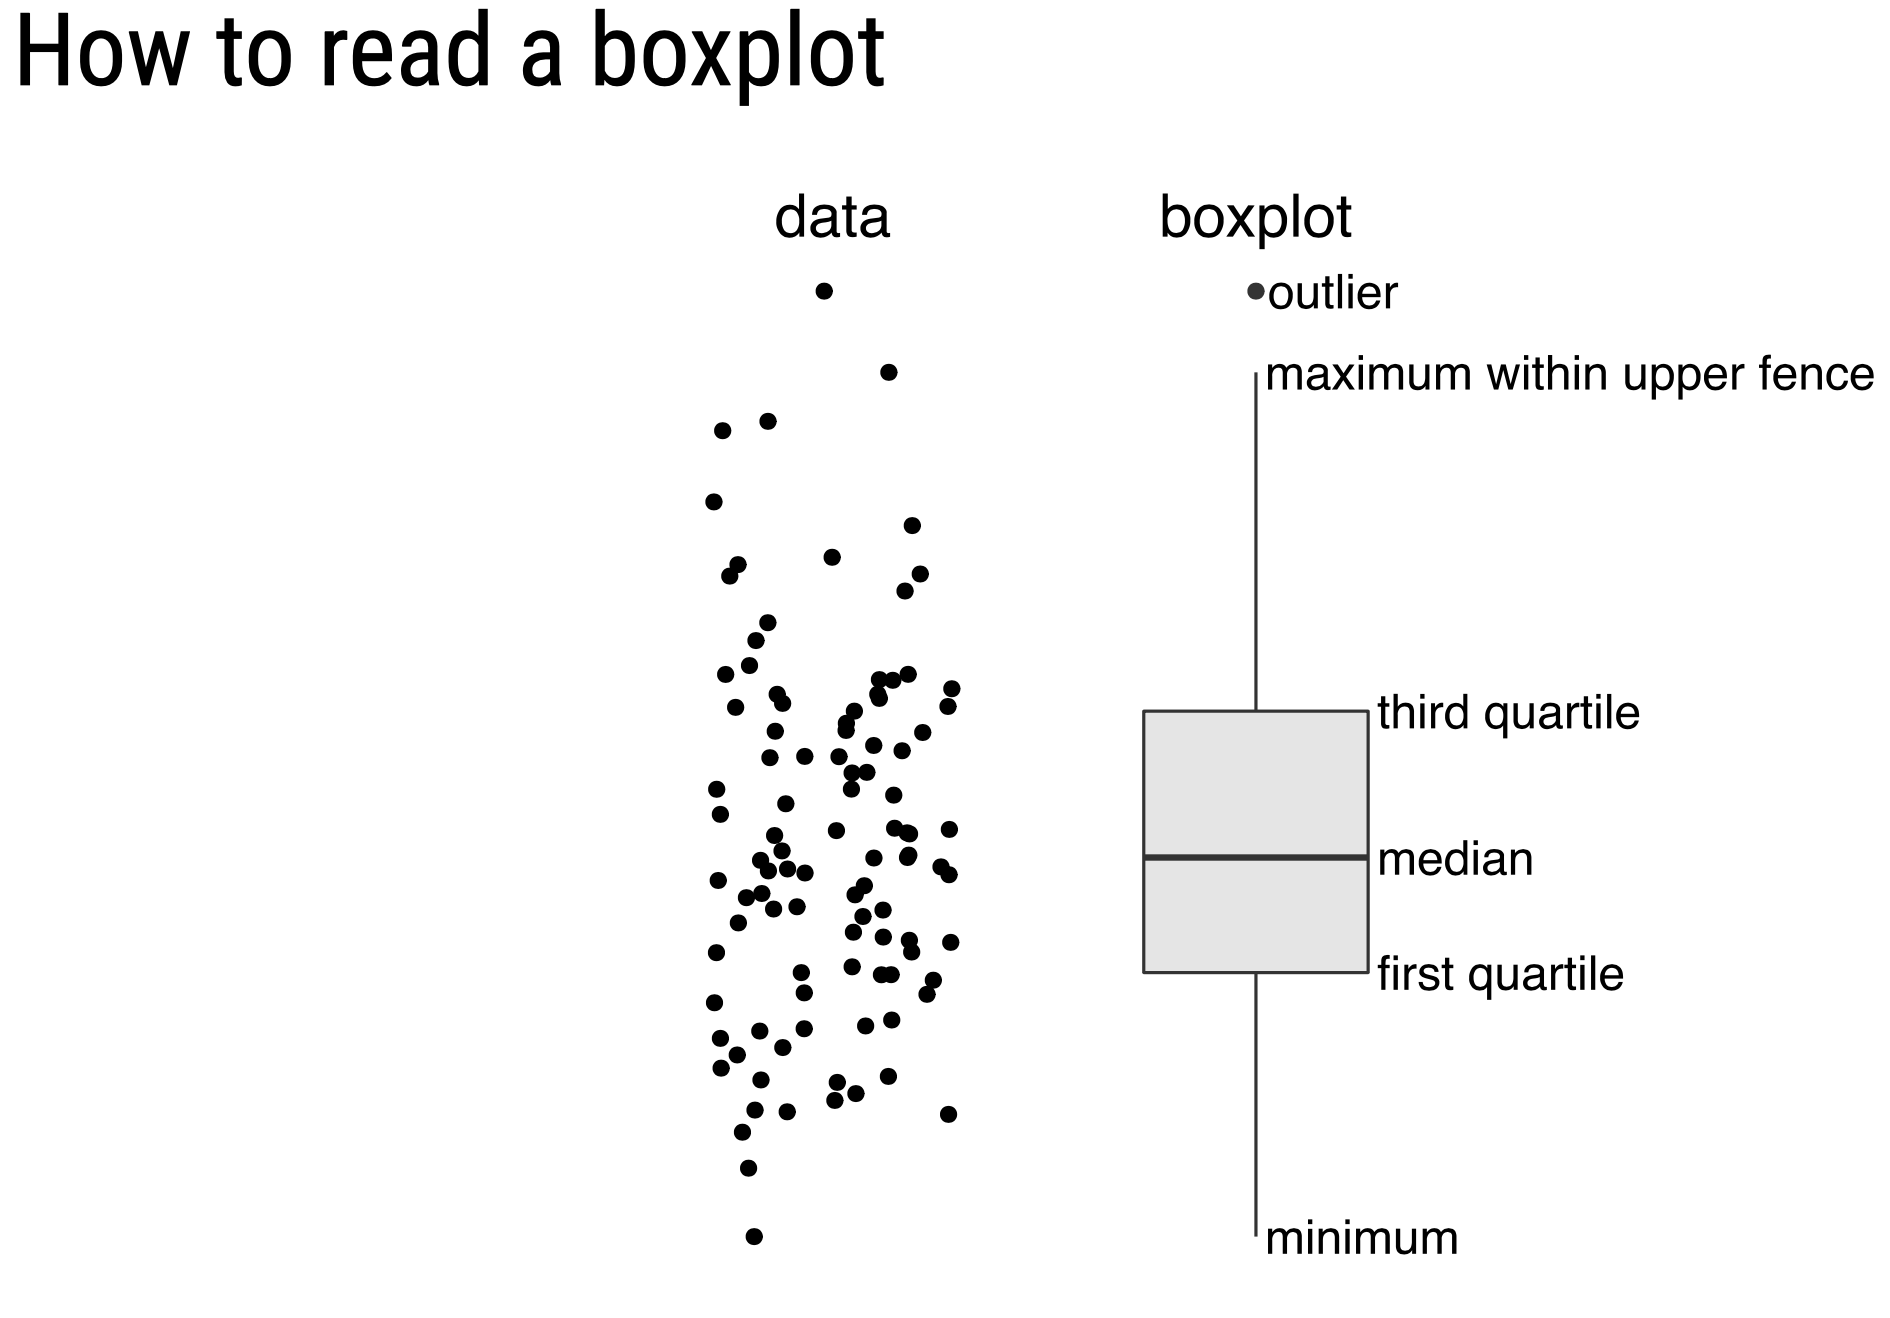

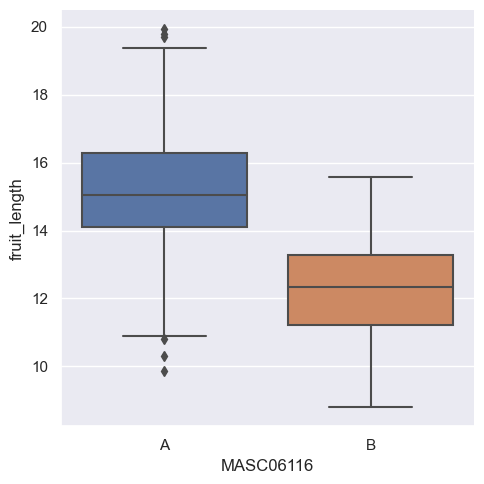

In [38]:
sns.catplot(y="fruit_length", x="MASC06116", kind="box", data=fruit_length_geno)


**Exercise 2.1.1**: 

*A*. get the fruit length data for the plants with each genotype at marker MASC06116. Run the `describe` function on the groups.

*B*. Compare the results from *A* to the box plot above. Make at least 3 numeric comparisons to what is on the plot (Fill in below):

1.
2.
3.

We can also flip the axes:

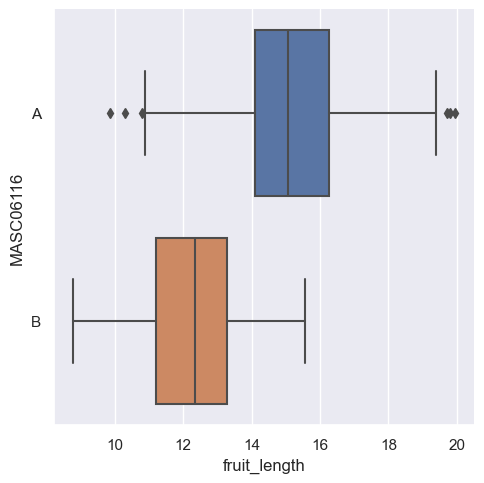

In [39]:
sns.catplot(x="fruit_length", y="MASC06116", kind="box", data=fruit_length_geno)


The hip modern plot is the violin plot. In seaborn, the violin plot combines elements of a boxplot and a histogram:

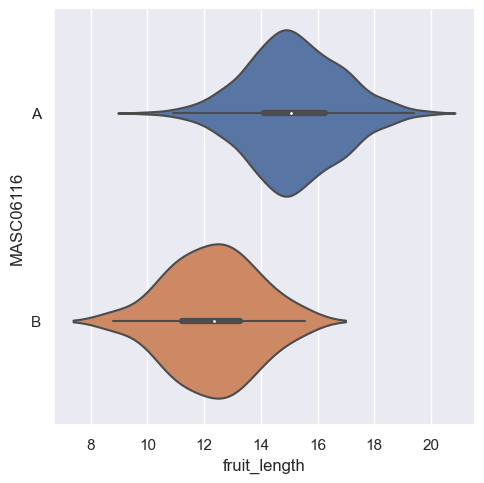

In [40]:
sns.catplot(x="fruit_length", y="MASC06116", kind="violin", data=fruit_length_geno)


**Exercise 2.1.2**: Compare the violin plot above to each of the following. What's the same? What's different?
- the box plot: (fill in answer)
- the strip plot: (fill in answer)
- the previous histogram we made copied below: (fill in answer)

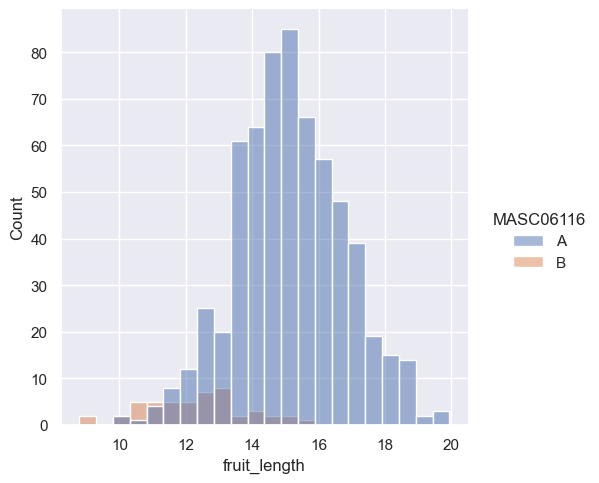

In [7]:
sns.displot(data=fruit_length_geno, x="fruit_length", hue='MASC06116') #,stat='density',common_norm=False, kde=True)

In [9]:
sites['has_mega'] = counts.loc[:,counts.columns.str.contains("Megalaima")].sum(axis=1) > 0
import seaborn as sns

**Exercise 2.1.3**: Look through the [documentation](https://seaborn.pydata.org/tutorial/categorical.html#categorical-scatterplots) of various options of Seaborn plots for a catagorical with a number feature. Make one other plot involving a categorical and a number feature, of your choosing, using any of the data sets.

In [ ]:
%matplotlib inline

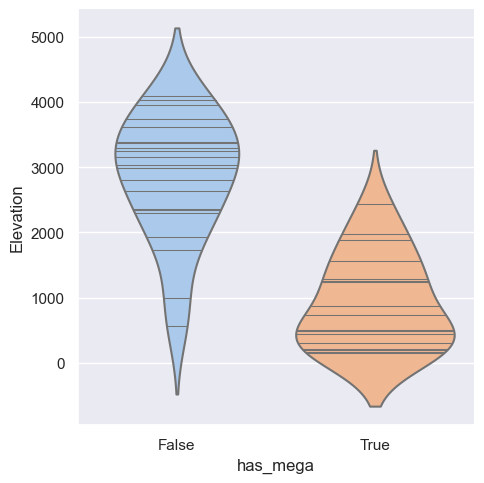

In [10]:
sns.catplot(x="has_mega", y="Elevation", data=sites, kind="violin", inner="stick", split=True,
            palette="pastel")

# 3 Figure legend (aka caption)
For one of the following figures, look at the figure and its legend. Write a less expert-level figure legend for each one:
- Figure 4 from [Parr 2016](https://onlinelibrary.wiley.com/doi/10.1111/icad.12211)
- Figure 2A from [Forner 2021](https://www.nature.com/articles/s41597-021-01054-y/figures/2)
- Pick a figure from [this post](https://ourworldindata.org/soy?country=)

# Further reading
See this [free book](https://clauswilke.com/dataviz) to learn more ideas about good data visualization. Unfortunately, mostly in R!

Also [Edward Tufte](https://www.edwardtufte.com/tufte/) is a famous data visualization expert.